# Image Preprocessing

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = './Lungs_Dataset/train'
val_dir = './Lungs_Dataset/val'
test_dir = './Lungs_Dataset/test'

In [3]:
image_generator = ImageDataGenerator(
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      shear_range=0.1,
                                      zoom_range=0.1,
                                      samplewise_center=True,
                                      samplewise_std_normalization=True
                                    )

In [4]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(320, 320))

validation = image_generator.flow_from_directory(val_dir, 
                                                 batch_size=1, 
                                                 shuffle=False, 
                                                 class_mode='binary',
                                                 target_size=(320, 320))

test = image_generator.flow_from_directory(test_dir, 
                                           batch_size=1, 
                                           shuffle=False, 
                                           class_mode='binary',
                                           target_size=(320, 320))

Found 4115 images belonging to 3 classes.
Found 1029 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height, one single color channel.
The maximum pixel value is 3.5601 and the minimum is -4.2433
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


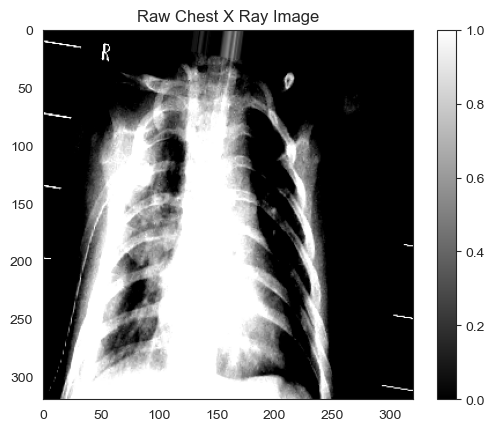

In [5]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

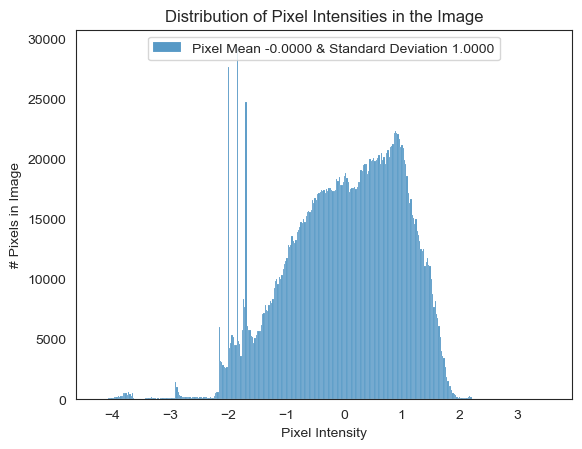

In [6]:
sns.histplot(generated_image.ravel(),
             label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", 
             kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')